#### Tutorial 3 - Using Python API

* https://fluidenginedevelopment.org/documentation/python.html

In [ ]:
import pyjet

In [1]:
from pyjet import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def main():
    # More codes here

if __name__ == '__main__':
    Logging.mute()
    main()

IndentationError: expected an indented block (3181311300.py, line 10)

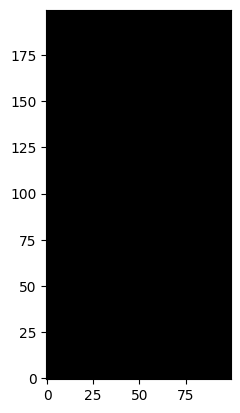

In [9]:
from pyjet import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ANIM_NUM_FRAMES = 360
ANIM_FPS = 60


def main():
    # Create smoke solver
    resX = 100
    solver = GridSmokeSolver2(resolution=(resX, 2 * resX), domainSizeX=1.0)

    # Customize pressure solver for real-time sim (less accurate, but much faster)
    pressureSolver = GridFractionalSinglePhasePressureSolver2()
    pressureSolver.linearSystemSolver = FdmGaussSeidelSolver2(20, 20, 0.001)
    solver.pressureSolver = pressureSolver

    # Setup emitter
    sphere = Sphere2(center=(0.5, 0.5), radius=0.15)
    emitter = VolumeGridEmitter2(sourceRegion=sphere)
    solver.emitter = emitter
    emitter.addStepFunctionTarget(solver.smokeDensity, 0.0, 1.0)
    emitter.addStepFunctionTarget(solver.temperature, 0.0, 1.0)

    # Visualization
    fig = plt.figure()
    den = np.array(solver.smokeDensity.dataAccessor(), copy=False)
    im = plt.imshow(den, vmin=0, vmax=1, cmap=plt.cm.gray,
                    interpolation='bicubic', animated=True, origin='lower')

    # Animation
    frame = Frame(0, 1.0 / ANIM_FPS)
    def updatefig(*args):
        solver.update(frame)
        frame.advance()
        den = np.array(solver.smokeDensity.dataAccessor(), copy=False)
        im.set_data(den)
        return im,

    if len(sys.argv) > 1:
        format = sys.argv[1]
        if format == 'gif':
            anim = animation.FuncAnimation(fig, updatefig,
                                           frames=ANIM_NUM_FRAMES,
                                           interval=ANIM_FPS, blit=True)
            anim.save('smoke_example01.gif', fps=ANIM_FPS, dpi=72,
                      writer='imagemagick')
            print(f'Q')
        elif format == 'mp4':
            anim = animation.FuncAnimation(fig, updatefig,
                                           frames=ANIM_NUM_FRAMES,
                                           interval=ANIM_FPS, blit=True)
            anim.save('smoke_example01.mp4', fps=ANIM_FPS, writer='ffmpeg')
            print(f'Q')
    else:
        anim = animation.FuncAnimation(fig, updatefig, frames=ANIM_NUM_FRAMES,
                                       interval=1, blit=True)
        print(f'Q')
        plt.show()


if __name__ == '__main__':
    Logging.mute()
    main()